In [1]:
import pandas as pd

In [2]:

df = pd.read_csv('frames.csv')


In [3]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCTGACCTCGGAATGCGTGGTCTCCATGCGC...
1,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...
2,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCCGACCTCGGGAATGCGGTCTCCATGCGCG...
3,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGCCGACCTCAGAATGCGGTCTCCATGCGCGTT...
4,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCCGACCTCGGAGATGCGGTCACCATGCGCG...
...,...,...
269704,ATCGTGGTATCCCTCCAACCCGAATGACCTGGCGAGGCAGATCAAC...,TATCGTGGTATCCTCCAACCCGAATGACCTGGCGAGGCAGATCAAC...
269705,ATCGTGGTATCCCTCCAACCCGAATGACCTGGCGAGGCAGATCAAC...,ATCGTGGTATCCCTCCAACCCGAATGACCTGGCGAGGCAGATCAAC...
269706,ATCGTGGTATCCCTCCAACCCGAATGACCTGGCGAGGCAGATCAAC...,AATGCAATCCTCCAACCCGAATGACCTGGCGAGGCAGATCAACTTG...
269707,ATCGTGGTATCCCTCCAACCCGAATGACCTGGCGAGGCAGATCAAC...,ATCGTGGTATCCCTCCAACCCGAATGACCTGGCGAGGCAGATCAAC...


In [4]:
from tqdm import tqdm


In [5]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [6]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [7]:
import difflib


In [8]:
def print_diff(ref_strand, noisy_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, noisy_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = noisy_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]


            
        
    #print('')


In [9]:
pairs = []
pairs_no_pos = []


for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff(ref_strands[i], noisy_strands[i])


100%|██████████| 269709/269709 [03:56<00:00, 1139.35it/s]


100%|██████████| 269709/269709 [00:03<00:00, 80753.25it/s]


[28819, 32333, 35937, 39281, 42437, 46620, 50189, 53098, 56198, 58637, 61369, 64877, 68495, 70743, 73198, 76713, 79117, 80991, 84050, 86365, 88352, 90504, 93388, 94732, 96981, 99822, 101723, 103101, 104913, 107396, 108758, 110307, 112407, 114293, 115952, 116688, 119154, 120305, 121774, 123666, 125292, 126422, 127579, 129083, 130375, 131540, 132615, 133434, 135269, 136253, 136967, 137646, 138126, 139787, 141127, 141951, 142170, 143068, 144339, 144994, 146209, 145651, 146551, 148315, 149100, 148868, 149812, 150654, 151058, 152271, 152631, 152068, 153084, 153918, 154995, 154498, 155038, 156334, 156694, 156277, 157608, 157433, 157996, 159092, 160003, 158892, 159790, 160877, 160869, 160589, 161221, 161644, 162496, 163489, 163004, 163056, 162951, 164013, 163967, 164405, 164647, 165696, 165921, 165661, 166048, 166215, 152881, 131932, 103895, 71430, 0]


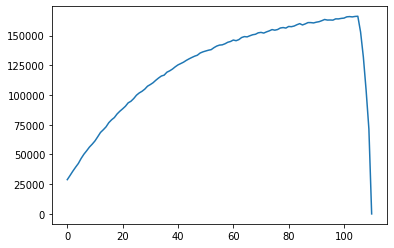

In [10]:
strand_len = 110
count_pos = [0] * (strand_len + 1)

def print_diff2(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff2(ref_strands[i], noisy_strands[i])

import matplotlib.pyplot as plt
plt.plot(range(strand_len + 1), count_pos)
print(count_pos)

In [11]:
import numpy as np


In [12]:
subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

In [13]:
for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)

CTCTT ->  6
 -> ATAAT 6
 -> CCCCT 6
T -> GCAA 6
CTCGT ->  6
 -> TCATG 6
 -> GGGGA 6
TTTAC ->  6
ATAAG ->  6
CTCTC ->  6
CA -> TTGGT 6
CA -> GTT 6
CCTT -> G 6
TT -> CAGC 6
CTGCC ->  6
AAAC -> GT 6
 -> GTAAT 6
ATAG -> C 6
TTCG -> A 6
G -> TAAC 6
GCGGT ->  6
A -> TGTT 6
GGC -> ATTA 6
CT -> AG 6
 -> TCCCC 6
ATACG ->  6
 -> CGGCC 6
AAAA -> T 6
TTAAG ->  6
GG -> TAAA 6
CTATA ->  6
TTTAT -> CGGC 6
AT -> GGG 6
T -> CGAA 6
TGTG -> C 6
TG -> CAC 6
TGTG -> CA 6
GG -> TCA 6
GG -> CCA 6
 -> CCTTT 6
CACAA ->  6
CCCGG -> A 6
GTAAT ->  6
T -> CGCG 6
AAAAT -> C 6
CTAAG ->  6
T -> CCAGC 6
GG -> ACAT 6
T -> CCAG 6
 -> TTAAT 6
TT -> AGCA 6
 -> AAATC 6
CTAA -> G 6
TGTCT ->  6
A -> TTCG 6
ATAAA ->  6
CCCGT ->  6
GTGT -> AA 6
C -> TTTAT 6
GG -> ATTA 6
TC -> GA 6
 -> CGTC 6
G -> ACAC 6
ATT -> CGC 6
 -> GCTTT 6
 -> AGGCA 6
TT -> AAG 6
GATT -> C 6
GCC -> AAA 6
GTCT -> A 6
GTCTG ->  6
ACTTG ->  6
 -> AAGCC 6
ATTGC ->  6
GCC -> TAT 6
TGGCC ->  6
G -> AACT 6
TTTA -> CG 6
CACC -> T 6
 -> AAGGA 6
 -> TGGGG 6
CCC -> 

In [14]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [15]:
for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)


TGT -> C @ 40 6
TT -> G @ 66 6
TTT ->  @ 80 6
 -> CCA @ 94 6
 -> CGC @ 39 6
TT -> G @ 92 6
TGC ->  @ 99 6
TGT -> C @ 44 6
 -> ATA @ 53 6
TTT ->  @ 78 6
TTT ->  @ 79 6
TGC ->  @ 98 6
TGT -> C @ 5 6
 -> AGG @ 46 6
TA -> CC @ 2 6
T -> GCC @ 3 6
 -> CGC @ 27 6
 -> AAA @ 40 6
 -> CCA @ 6 6
TAC ->  @ 26 6
TG -> A @ 49 6
T -> GCC @ 62 6
TG -> A @ 4 6
 -> CAA @ 88 6
TA -> C @ 16 6
TA -> C @ 18 6
TA -> C @ 19 6
 -> ACC @ 91 6
 -> CAA @ 97 6
TA -> C @ 22 6
TA -> C @ 95 6
TA -> C @ 92 6
TA -> C @ 13 6
TG -> A @ 3 6
TA -> C @ 68 6
 -> CAG @ 69 6
TA -> C @ 33 6
TA -> C @ 5 6
 -> CAA @ 95 6
 -> AAA @ 45 6
TTT ->  @ 24 6
 -> AAA @ 5 6
T -> GCC @ 61 6
TGC ->  @ 70 6
TGT -> C @ 52 6
T -> GCC @ 78 6
TA -> C @ 10 6
TAC ->  @ 31 6
 -> CGG @ 64 6
T -> GCC @ 37 6
TGC ->  @ 58 6
TG -> CA @ 2 6
T -> GCC @ 4 6
T -> GCC @ 40 6
TGC ->  @ 6 6
TGC ->  @ 92 6
 -> AAA @ 64 6
 -> CAA @ 86 6
 -> CGC @ 31 6
TGT -> A @ 7 6
 -> AAA @ 68 6
TAA -> G @ 73 6
TCG ->  @ 25 6
TGC ->  @ 88 6
 -> CAT @ 0 6
TGC ->  @ 66 6
TG -> A 

In [16]:
import matplotlib.pyplot as plt

In [17]:
strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

[21722, 18098, 13394, 9558, 8574, 8462, 8883, 9276, 9603, 9331, 9222, 8762, 9317, 9203, 9399, 9594, 9508, 9440, 9501, 9328, 9869, 9739, 9851, 9894, 9940, 9626, 10040, 9909, 9992, 9982, 10256, 10014, 10015, 10196, 10363, 10590, 9980, 10645, 10277, 10219, 10532, 10342, 10695, 10613, 10886, 10777, 10567, 10517, 10545, 10781, 10496, 10692, 10819, 10720, 10484, 10587, 10444, 10512, 10499, 10557, 10631, 10894, 10674, 11043, 10707, 11167, 10772, 11079, 10945, 10693, 10896, 10386, 10780, 10574, 10898, 11154, 10424, 10546, 10674, 10821, 10738, 10842, 11034, 10795, 10952, 11108, 10616, 10967, 10855, 11218, 10672, 10765, 10811, 10644, 10389, 10688, 10449, 10395, 10373, 10531, 10662, 10846, 11596, 11983, 11848, 11794, 11504, 10926, 10611, 8877, 40772]


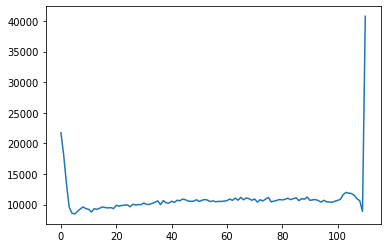

In [18]:
plt.plot(range(strand_len + 1), pos_counts)

In [19]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

print(pos_map['_ -> T'])

[5536, 398, 691, 455, 502, 467, 440, 474, 524, 554, 589, 537, 540, 542, 544, 537, 523, 537, 532, 564, 553, 573, 557, 507, 548, 508, 542, 565, 604, 614, 566, 607, 562, 628, 614, 598, 589, 606, 542, 539, 617, 579, 675, 637, 565, 585, 591, 624, 623, 615, 609, 609, 591, 635, 573, 576, 577, 569, 591, 571, 623, 653, 624, 589, 607, 648, 605, 648, 571, 592, 661, 575, 578, 588, 613, 607, 552, 543, 626, 603, 563, 628, 622, 588, 574, 620, 592, 573, 545, 584, 553, 549, 562, 534, 526, 579, 568, 580, 594, 688, 684, 837, 890, 872, 628, 544, 535, 540, 566, 457, 1171]


In [20]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-20:]
max_10_counts = counts_no_pos[-20:]


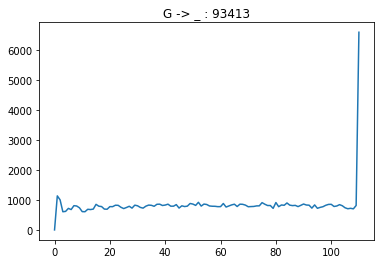

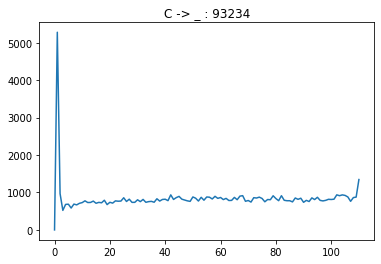

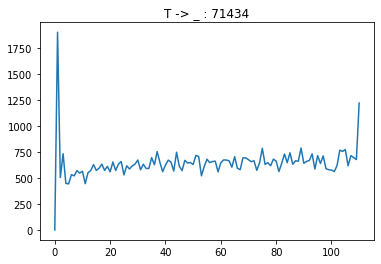

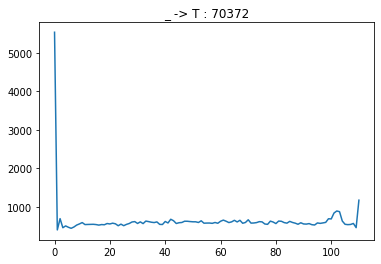

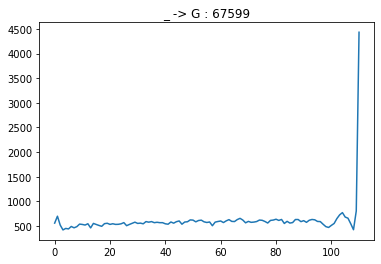

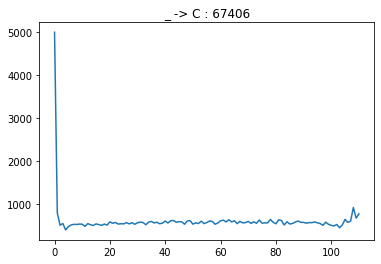

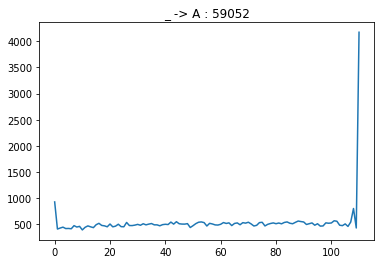

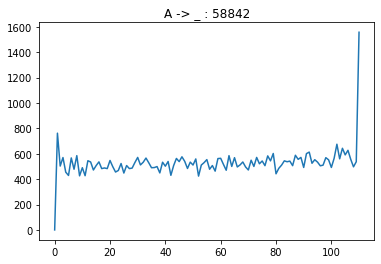

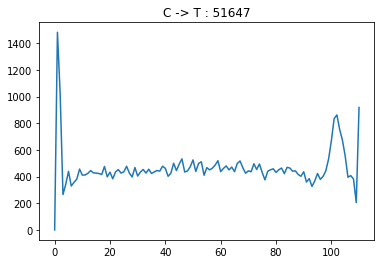

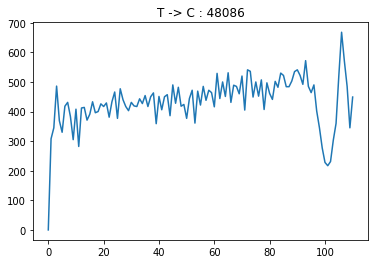

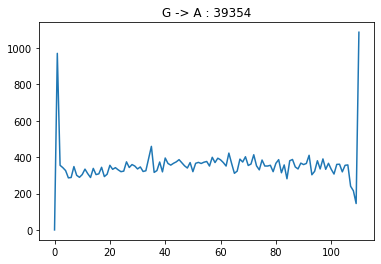

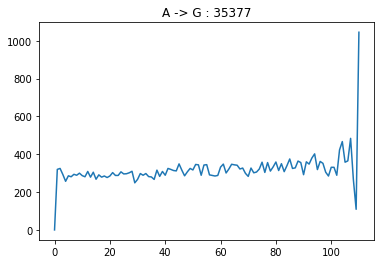

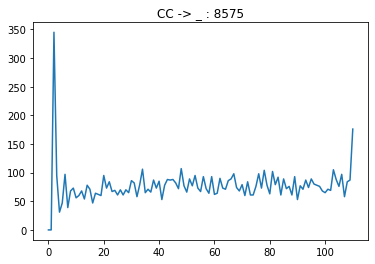

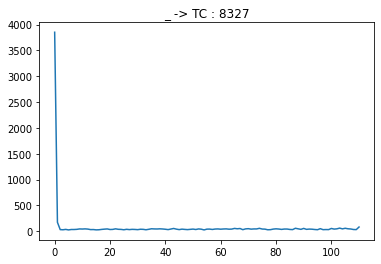

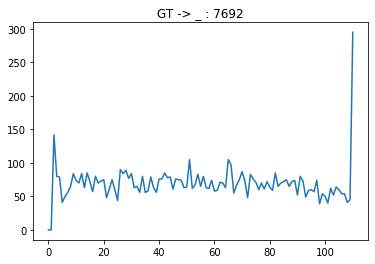

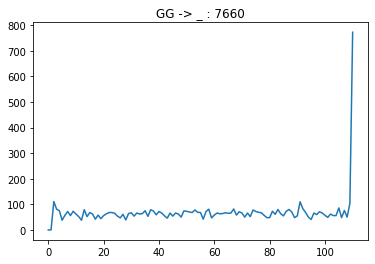

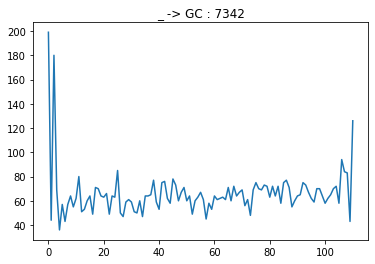

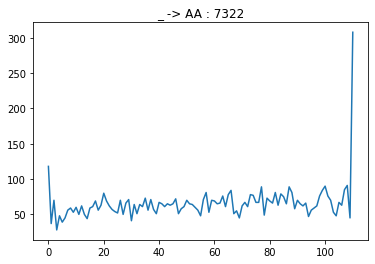

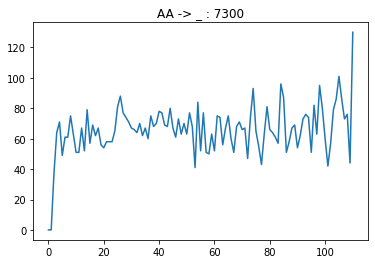

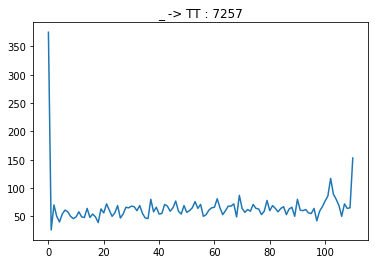

In [21]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    plt.title(f'{key} : {count}')
    plt.plot(range(strand_len + 1), pos_map[key])

In [22]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)